# Answer 1

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
from scipy.stats import multivariate_normal
from sklearn.model_selection import KFold
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import multivariate_normal

In [33]:
'''helper functions'''


def MAP_label(data):
    map1 = priors[0]*multivariate_normal(μ1, Σ1).pdf(data)
    map2 = priors[1]*multivariate_normal(μ2, Σ2).pdf(data)
    map3 = priors[2]*multivariate_normal(μ3, Σ3).pdf(data)
    map4 = priors[3]*multivariate_normal(μ4, Σ4).pdf(data)
    return np.argmax([map1, map2, map3, map4])+1

%matplotlib notebook
def sample_data(size):
    # Generating the dataset
    dataset_dist = np.random.uniform(0, 1, size)
    μ1, Σ1, data1, lab1 = gaussianone(len(dataset_dist[dataset_dist <= priors[0]]))
    μ2, Σ2, data2, lab2 = gaussiantwo(len([x for x in dataset_dist if x > priors[0] and x <= (priors[0]+priors[1])]))
    μ3, Σ3, data3, lab3 = gaussianthree(len([x for x in dataset_dist if x > (priors[0]+priors[1]) and x <= (priors[0]+priors[1]+priors[2])]))
    μ4, Σ4, data4, lab4 = gaussianfour(len([x for x in dataset_dist if x > (priors[0]+priors[1]+priors[2])]))
    dataset = np.vstack([data1, data2, data3, data4])
    label = np.array(lab1.tolist() + lab2.tolist() + lab3.tolist() + lab4.tolist())
    mle_prob = []
    for data in dataset_dist:
        mle1 = multivariate_normal(μ1, Σ1).pdf(data)
        mle2 = multivariate_normal(μ2, Σ2).pdf(data)
        mle3 = multivariate_normal(μ3, Σ3).pdf(data)
        mle4 = multivariate_normal(μ4, Σ4).pdf(data)
        mle_prob.append([mle1, mle2, mle3, mle4])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data1[:, 0], data1[:, 1], data1[:, 2], label='Class 1', s=5)
    ax.scatter(data2[:, 0], data2[:, 1], data2[:, 2], label='Class 2', s=5)
    ax.scatter(data3[:, 0], data3[:, 1], data3[:, 2], label='Class 3', s=5)
    ax.scatter(data4[:, 0], data4[:, 1], data4[:, 2], label='Class 4', s=5)
    ax.legend()
    ax.set_xlabel('X1 dimension')
    ax.set_ylabel('X2 dimension')
    ax.set_zlabel('X3 dimension')
    ax.set_title('3D scatter plot of the dataset with {} samples'.format(size))
    return dataset, label, mle_prob



def generate_data_MAP(samples):
    dataset_dist = np.random.uniform(0, 1, samples)
    μ1, Σ1, data1, classone = gaussianone(len(dataset_dist[dataset_dist <= priors[0]]))
    μ2, Σ2, data2, classtwo = gaussiantwo(len([x for x in dataset_dist if x > priors[0] and x <= (priors[0]+priors[1])]))
    μ3, Σ3, data3, classthree = gaussianthree(len([x for x in dataset_dist if x > (priors[0]+priors[1]) and x <= (priors[0]+priors[1]+priors[2])]))
    μ4, Σ4, data4, classfour = gaussianfour(len([x for x in dataset_dist if x > (priors[0]+priors[1]+priors[2])]))
    dataset = np.vstack([data1, data2, data3, data4])
    label = np.array(classone.tolist() + classtwo.tolist() + classthree.tolist() + classfour.tolist())
    %matplotlib notebook
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data1[:, 0], data1[:, 1], data1[:, 2], label='Label 1', s=5)
    ax.scatter(data2[:, 0], data2[:, 1], data2[:, 2], label='Label 2', s=5)
    ax.scatter(data3[:, 0], data3[:, 1], data3[:, 2], label='Label 3', s=5)
    ax.scatter(data4[:, 0], data4[:, 1], data4[:, 2], label='Label 4', s=5)
    ax.legend()
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.set_title('3D scatter plot of the dataset')
    return data1,data2,data3,data4,label,dataset,μ1,μ2,μ3,μ4,Σ1,Σ2,Σ3,Σ4


%matplotlib notebook
def MAP_classify_data(data1, data2, data3, data4, title_str,μ1,μ2,μ3,μ4,Σ1,Σ2,Σ3,Σ4):
    correct_data1 = []
    incorrect_data1 = []
    correct_data2 = []
    incorrect_data2 = []
    correct_data3 = []
    incorrect_data3 = []
    correct_data4 = []
    incorrect_data4 = []
    correct_data = [correct_data1, correct_data2, correct_data3, correct_data4]
    incorrect_data = [incorrect_data1, incorrect_data2, incorrect_data3, incorrect_data4]
    for i, data_part in enumerate([data1, data2, data3, data4]):
        for data in data_part:
            if MAP_label(data) == (i+1):
                correct_data[i].append(data)
            else:
                incorrect_data[MAP_label(data)-1].append(data)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(np.array(correct_data1)[:, 0], np.array(correct_data1)[:, 1], np.array(correct_data1)[:, 2], label='Correctly classified as Class 1', s=5)
    ax.scatter(np.array(correct_data2)[:, 0], np.array(correct_data2)[:, 1], np.array(correct_data2)[:, 2], label='Correctly classified as Class 2', s=5)
    ax.scatter(np.array(correct_data3)[:, 0], np.array(correct_data3)[:, 1], np.array(correct_data3)[:, 2], label='Correctly classified as Class 3', s=5)
    ax.scatter(np.array(correct_data4)[:, 0], np.array(correct_data4)[:, 1], np.array(correct_data4)[:, 2], label='Correctly classified as Class 4', s=5)
    try:
        ax.scatter(np.array(incorrect_data1)[:, 0], np.array(incorrect_data1)[:, 1], np.array(incorrect_data1)[:, 2], label='Incorrectly classified as Class 1', s=5)
    except:
        pass
    try:
        ax.scatter(np.array(incorrect_data2)[:, 0], np.array(incorrect_data2)[:, 1], np.array(incorrect_data2)[:, 2], label='Incorrectly classified as Class 2', s=5)
    except:
        pass
    try:
        ax.scatter(np.array(incorrect_data3)[:, 0], np.array(incorrect_data3)[:, 1], np.array(incorrect_data3)[:, 2], label='Incorrectly classified as Class 3', s=5)
    except:
        pass
    try:
        ax.scatter(np.array(incorrect_data4)[:, 0], np.array(incorrect_data4)[:, 1], np.array(incorrect_data4)[:, 2], label='Incorrectly classified as Class 4', s=5)
    except:
        pass
    ax.legend()
    ax.set_xlabel('X1 dimension')
    ax.set_ylabel('X2 dimension')
    ax.set_zlabel('X3 dimension')
    ax.set_title('3D scatter plot of the '+title_str+ 'dataset classified by MAP classifier')
    misclass_num = len(incorrect_data1)+len(incorrect_data2)+len(incorrect_data3)+len(incorrect_data4)
    print('Number of misclassified samples are {}'.format(misclass_num))
    print('Probability of error achieved is {}'.format(misclass_num/10000))
    return
priors=[0.4,0.3,0.2,0.1]
def gaussianone(size):
    μ = [1, 2, 3]
    Σ = make_spd_matrix(n_dim=3)
    classone = np.ones(size)
    return μ, Σ, np.random.multivariate_normal(μ, Σ, size), classone.astype(int)
def gaussiantwo(size):
    μ = [-1, -2, -3]
    Σ = make_spd_matrix(n_dim=3)
    classtwo = np.zeros(size) + 2
    return μ, Σ, np.random.multivariate_normal(μ, Σ, size), classtwo.astype(int)
def gaussianthree(size):
    μ = [1, -2, -3]
    Σ = make_spd_matrix(n_dim=3)
    classthree = np.zeros(size) + 3
    return μ, Σ, np.random.multivariate_normal(μ, Σ, size), classthree.astype(int)
def gaussianfour(size):
    μ = [-1, 2, -3]
    Σ = make_spd_matrix(n_dim=3)
    classfour = np.zeros(size) + 4
    return μ, Σ, np.random.multivariate_normal(μ, Σ, size), classfour.astype(int)
def neural_network_cv(dataset, labels, hidd_layer_param_list, epochs=1000):
    kf = KFold(n_splits=10)
    param_prob_error = []
    for param in hidd_layer_param_list:
        pe_fold = []
        for train_index, test_index in kf.split(dataset):
            onehotencoder = OneHotEncoder(categories='auto')
            one_hot_label = onehotencoder.fit_transform(labels[:, None]).toarray()
            X_train, X_test = dataset[train_index], dataset[test_index]
            y_train, y_test = one_hot_label[train_index], one_hot_label[test_index]
            label_train, label_test = labels[train_index], labels[test_index]
            NN = Sequential()
            NN.add(Dense(param, input_dim=3, activation='sigmoid'))
            NN.add(Dense(4, activation='softmax'))
            NN.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
            NN.fit(X_train, y_train, epochs=epochs, verbose=0, batch_size=10000)
            y_pred = NN.predict_proba(X_test)
            misclass_count = len(np.nonzero((np.argmax(y_pred, axis=1).reshape((-1,)) + 1) != label_test)[0])
            pe_fold.append(misclass_count/len(train_label))
        param_prob_error.append(sum(pe_fold))
    print('Optimal nodes are {}'.format(hidd_layer_param_list[np.argmin(param_prob_error)]))
    return hidd_layer_param_list[np.argmin(param_prob_error)], param_prob_error


## Part 1. Generate dataset

The data used is a 3D data and mixture of 4 gaussian classes. The means are
* [1, 2, 3]
* [-1, -2, -3]
* [1, -2, -3]
* [-1, 2, -3]
* and the cov matrices are chosen randomly via the make_spd_matrix function

The priors are- [0.4,0.3,0.2,0.1]

### generate train data: 1000 samples

<IPython.core.display.Javascript object>


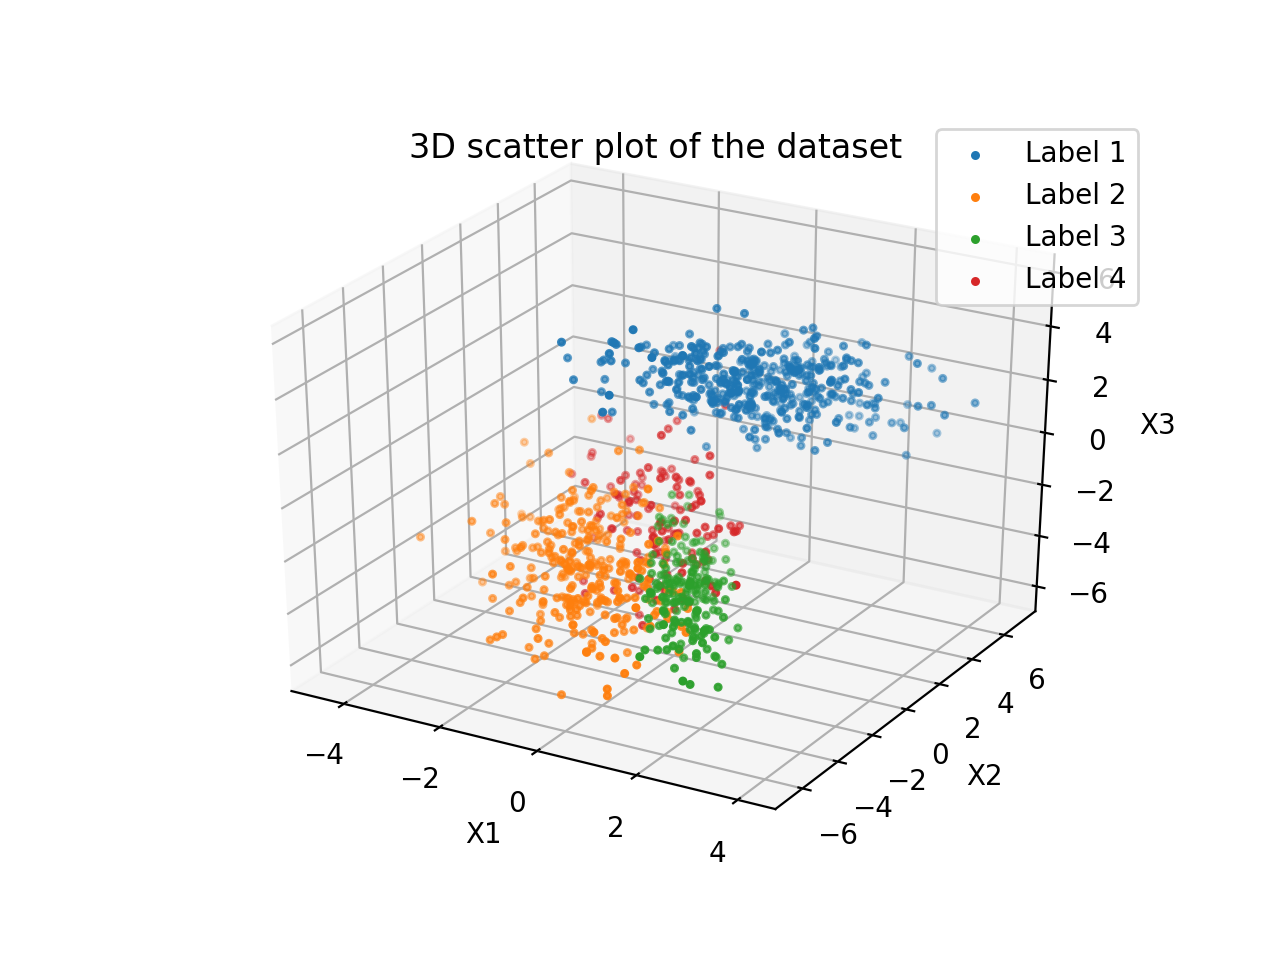

In [3]:
train_data1,train_data2,train_data3,train_data4,train_label,train_dataset,μ1,μ2,μ3,μ4,Σ1,Σ2,Σ3,Σ4=generate_data_MAP(1000)

### Part 2: theoretically optimal MAP classifier (0-1 loss)


<img style="; width:1000px" src="./images/IMG_6593.JPG" alt="sieve shaker" title="Title text" />



<img style="; width:1000px" src="./images/IMG_6594.JPG" alt="sieve shaker" title="Title text" />

<IPython.core.display.Javascript object>


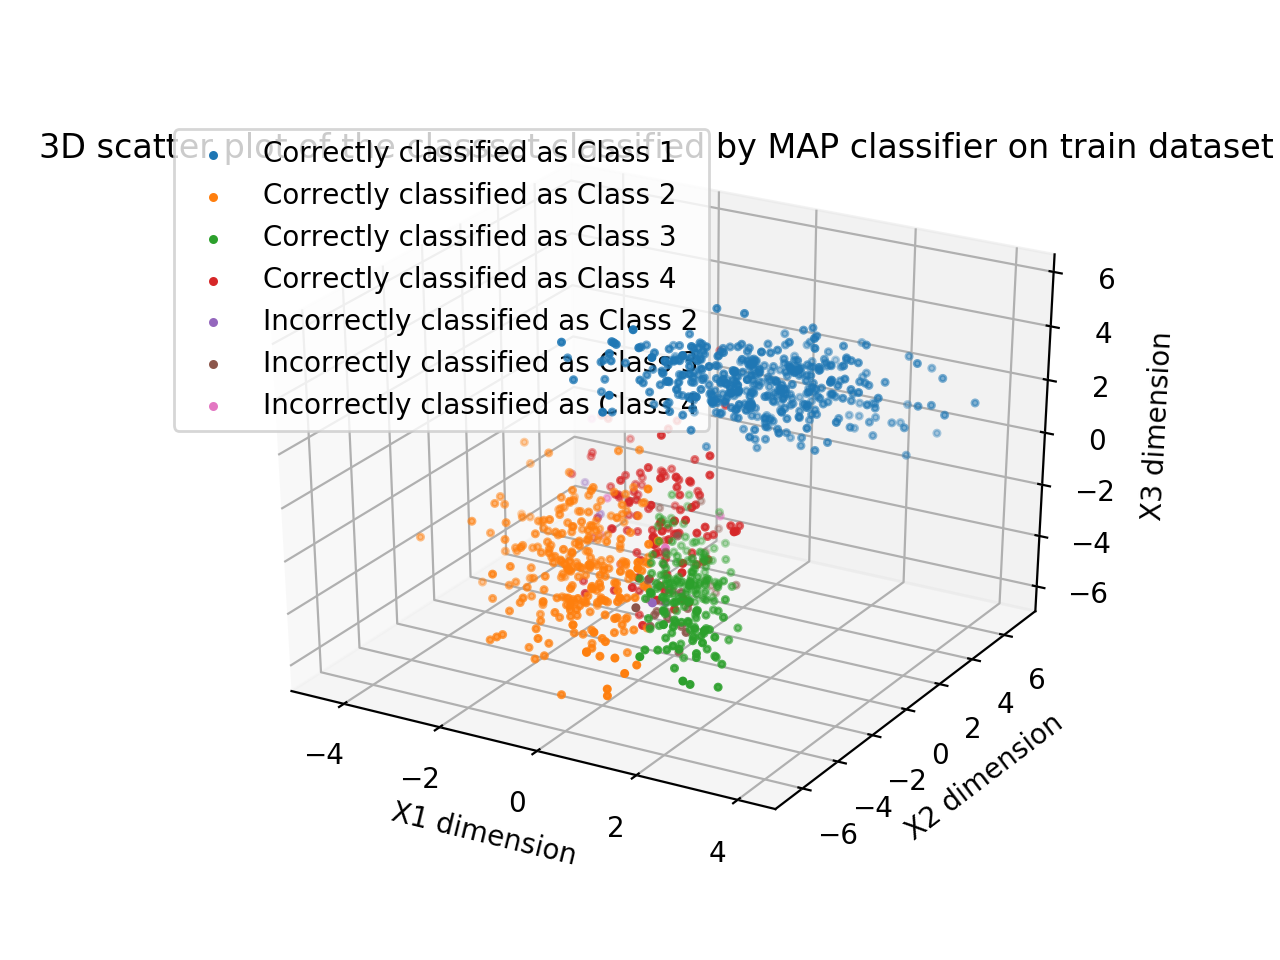

Text(0.5, 0.92, '3D scatter plot of the classset classified by MAP classifier on train dataset')

In [6]:
correct_class1 = []
incorrect_class1 = []
correct_class2 = []
incorrect_class2 = []
correct_class3 = []
incorrect_class3 = []
correct_class4 = []
incorrect_class4 = []
correct_class = [correct_class1, correct_class2, correct_class3, correct_class4]
incorrect_class = [incorrect_class1, incorrect_class2, incorrect_class3, incorrect_class4]
for i, class_part in enumerate([train_data1, train_data2, train_data3, train_data4]):
    for data in class_part:
        if MAP_label(data) == (i+1):
            correct_class[i].append(data)
        else:
            incorrect_class[MAP_label(data)-1].append(data)
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(correct_class1)[:, 0], np.array(correct_class1)[:, 1], np.array(correct_class1)[:, 2], label='Correctly classified as Class 1', s=5)
ax.scatter(np.array(correct_class2)[:, 0], np.array(correct_class2)[:, 1], np.array(correct_class2)[:, 2], label='Correctly classified as Class 2', s=5)
ax.scatter(np.array(correct_class3)[:, 0], np.array(correct_class3)[:, 1], np.array(correct_class3)[:, 2], label='Correctly classified as Class 3', s=5)
ax.scatter(np.array(correct_class4)[:, 0], np.array(correct_class4)[:, 1], np.array(correct_class4)[:, 2], label='Correctly classified as Class 4', s=5)
try:
    ax.scatter(np.array(incorrect_class1)[:, 0], np.array(incorrect_class1)[:, 1], np.array(incorrect_class1)[:, 2], label='Incorrectly classified as Class 1', s=5)
except:
    pass
try:
    ax.scatter(np.array(incorrect_class2)[:, 0], np.array(incorrect_class2)[:, 1], np.array(incorrect_class2)[:, 2], label='Incorrectly classified as Class 2', s=5)
except:
    pass
try:
    ax.scatter(np.array(incorrect_class3)[:, 0], np.array(incorrect_class3)[:, 1], np.array(incorrect_class3)[:, 2], label='Incorrectly classified as Class 3', s=5)
except:
    pass
try:
    ax.scatter(np.array(incorrect_class4)[:, 0], np.array(incorrect_class4)[:, 1], np.array(incorrect_class4)[:, 2], label='Incorrectly classified as Class 4', s=5)
except:
    pass
ax.legend()
ax.set_xlabel('X1 dimension')
ax.set_ylabel('X2 dimension')
ax.set_zlabel('X3 dimension')
ax.set_title('3D scatter plot of the classset classified by MAP classifier on train dataset')

<IPython.core.display.Javascript object>


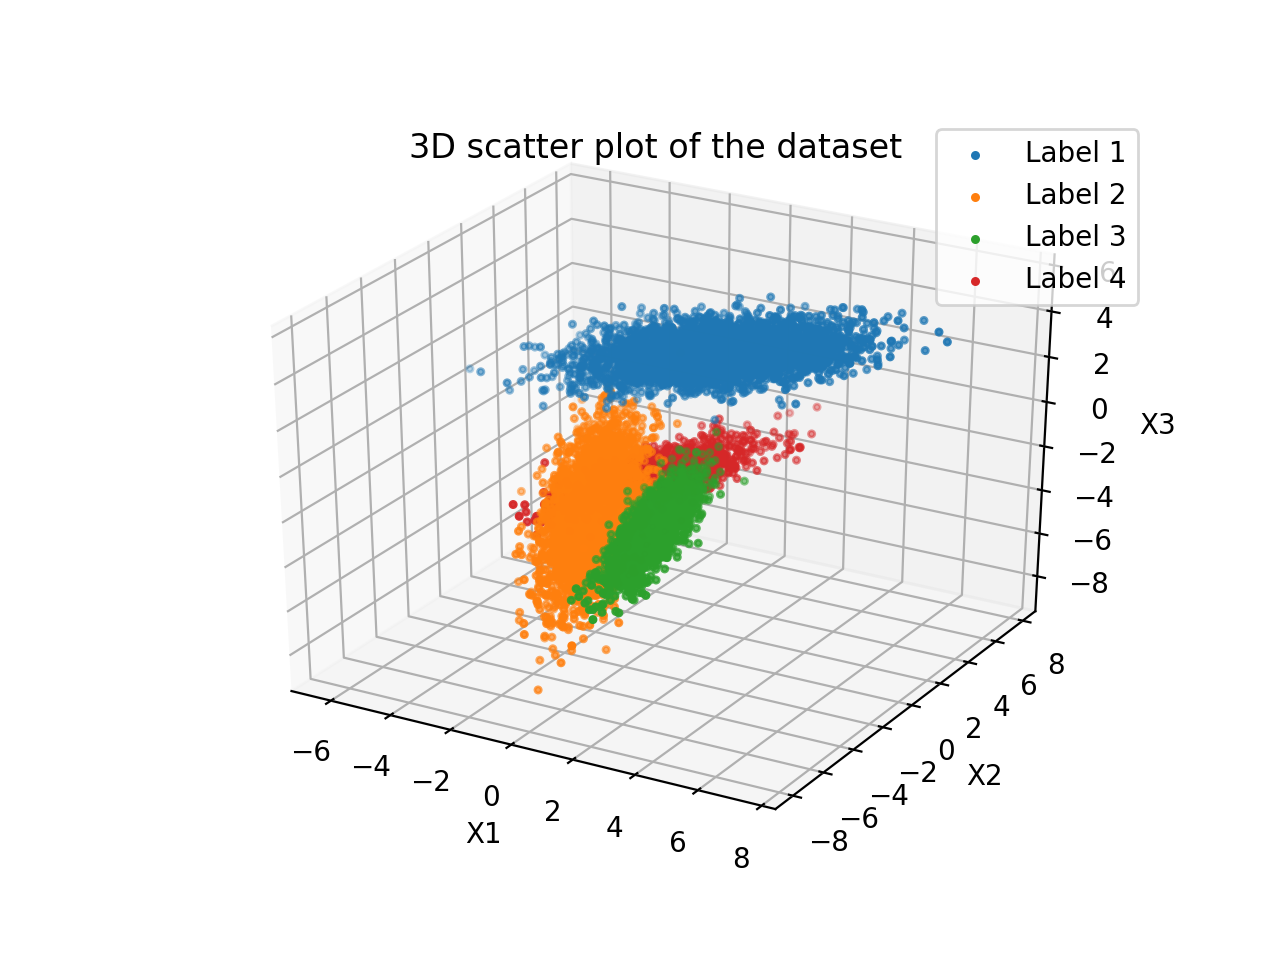

In [18]:
### generate test data: 10000 samples
test_data1,test_data2,test_data3,test_data4,test_label,test_dataset,_,_,_,_,_,_,_,_=generate_data_MAP(10000)

<IPython.core.display.Javascript object>


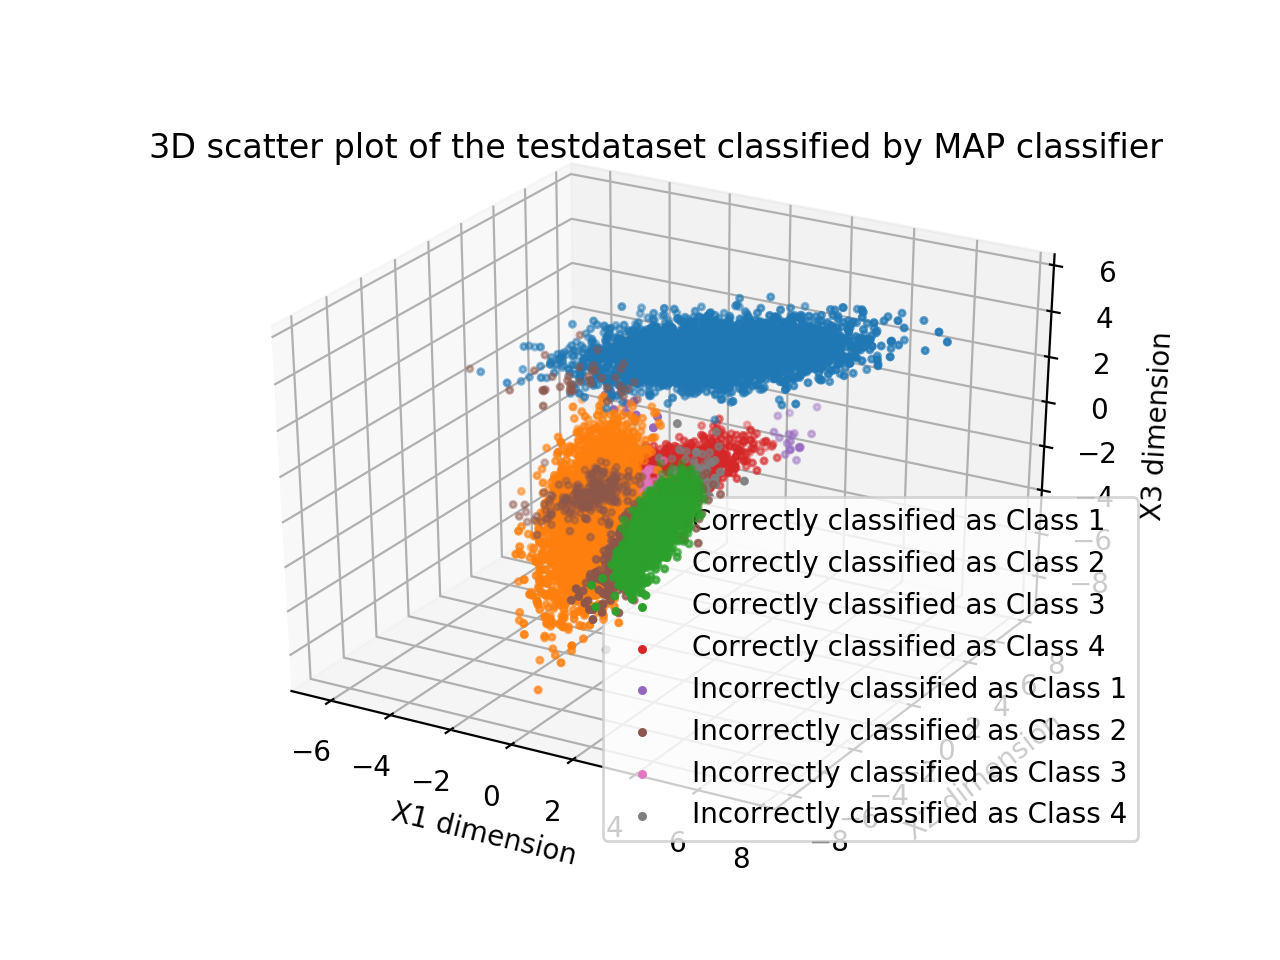

Number of misclassified samples are 692
Probability of error achieved is 0.0692


In [19]:
MAP_classify_data(test_data1, test_data2, test_data3, test_data4,'test',μ1,μ2,μ3,μ4,Σ1,Σ2,Σ3,Σ4)

* MAP Probability of Error is 6.92 %

## Part 3: Neural Network 

* The neural network approximates the class posterior probabilities (Implicity by using softmax at the output layer)
* We select the label which maximizes the class posterior
* Categorical loss function is -
<img style="; width:1000px" src="./images/cat_loss.png" alt="sieve shaker" title="Title text" />
where y is the true label; and y(hat) is the prediction

### 100 samples

<IPython.core.display.Javascript object>


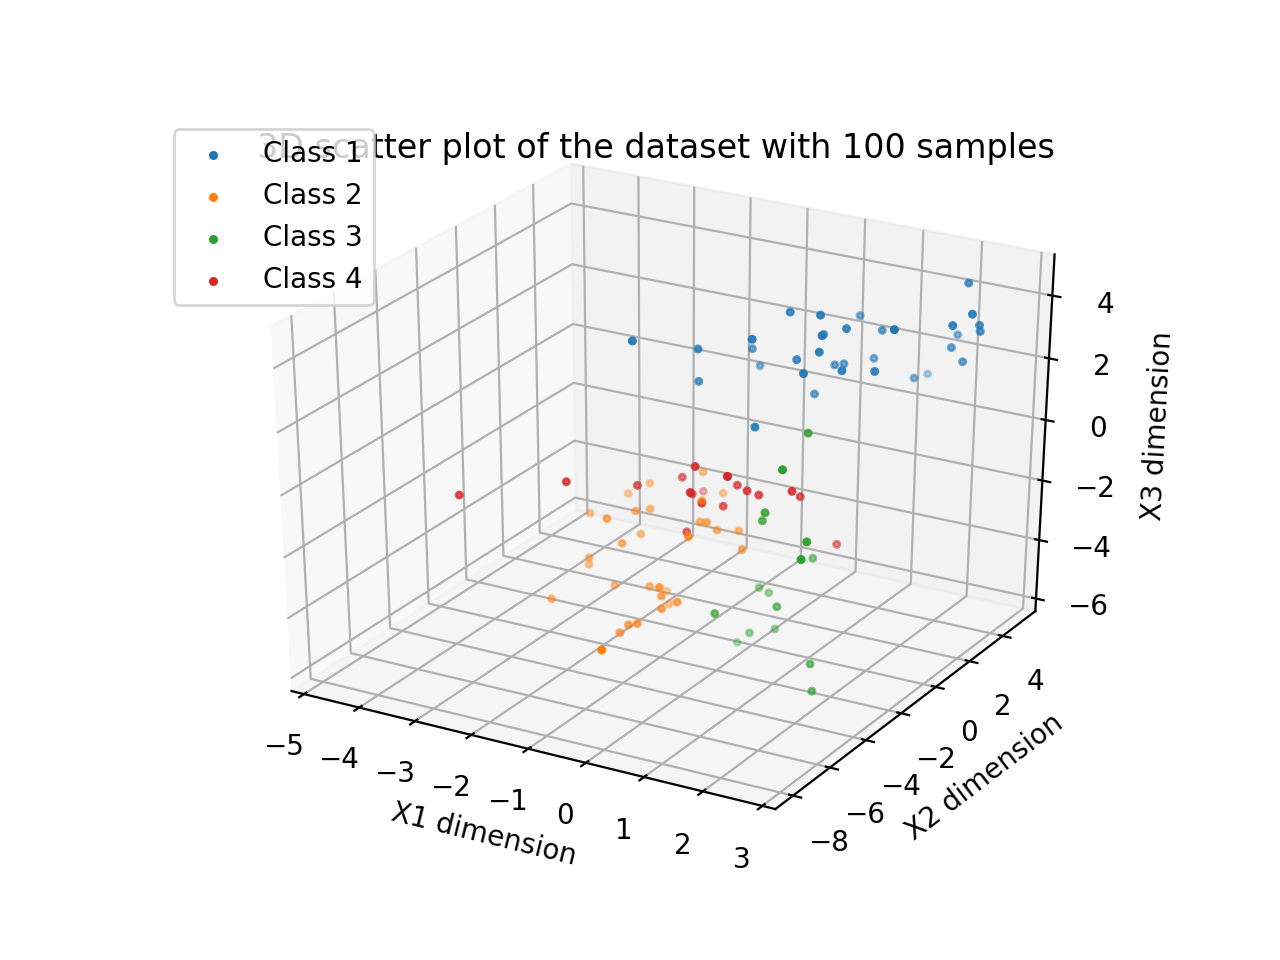

In [38]:
X, Y, _ = sample_data(100)

In [67]:
nodes, pe = neural_network_cv(X, Y, [10,15,20,25,30,35,40],epochs=2000)
print('Optimal number of perceptrons are {}'.format(nodes))

Optimal nodes are 20
Optimal number of perceptrons are 20


<IPython.core.display.Javascript object>


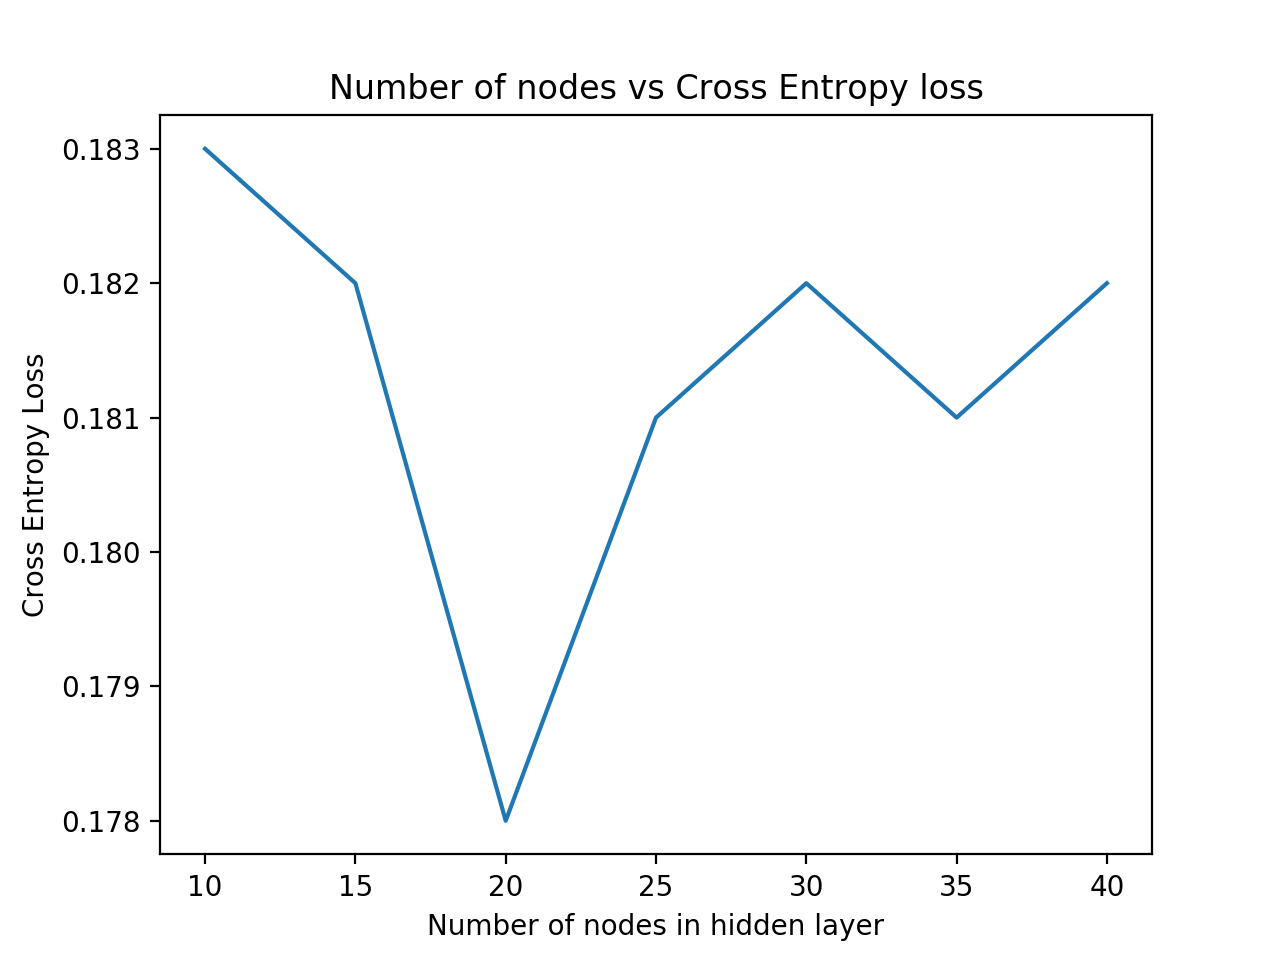

Text(0, 0.5, 'Cross Entropy Loss')

In [68]:
%matplotlib notebook
plt.plot([10,15,20,25,30,35,40], pe)
plt.title('Number of nodes vs Cross Entropy loss')
plt.xlabel('Number of nodes in hidden layer')
plt.ylabel('Cross Entropy Loss')

In [74]:
model = Sequential()
model.add(Dense(nodes, input_dim=3, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
onehotencoder = OneHotEncoder(categories='auto')
Y_hot = onehotencoder.fit_transform(Y[:, None]).toarray()
model.fit(X, Y_hot, epochs=5000, verbose=0)
y_pred = model.predict_proba(X)
incorrect_class = len(np.nonzero((np.argmax(y_pred, axis=1).reshape((-1,)) + 1) != Y)[0])
print('The number of misclassified samples on train set are {}'.format(incorrect_class))
print('The probability of error on train set is {}'.format(incorrect_class/len(Y)))
y_pred_tenk = model.predict_proba(test_dataset)
incorrect_class_tenk = len(np.nonzero((np.argmax(y_pred_tenk, axis=1).reshape((-1,)) + 1) != test_label)[0])

print('\n\nThe number of misclassified samples on test set are {}'.format(incorrect_class_tenk))
print('The probability of error on train set is {}'.format(incorrect_class_tenk/len(test_label)))

The number of misclassified samples on train set are 73
The probability of error on train set is 0.073


The number of misclassified samples on test set are 1003
The probability of error on train set is 0.1003


### 1000 samples

<IPython.core.display.Javascript object>


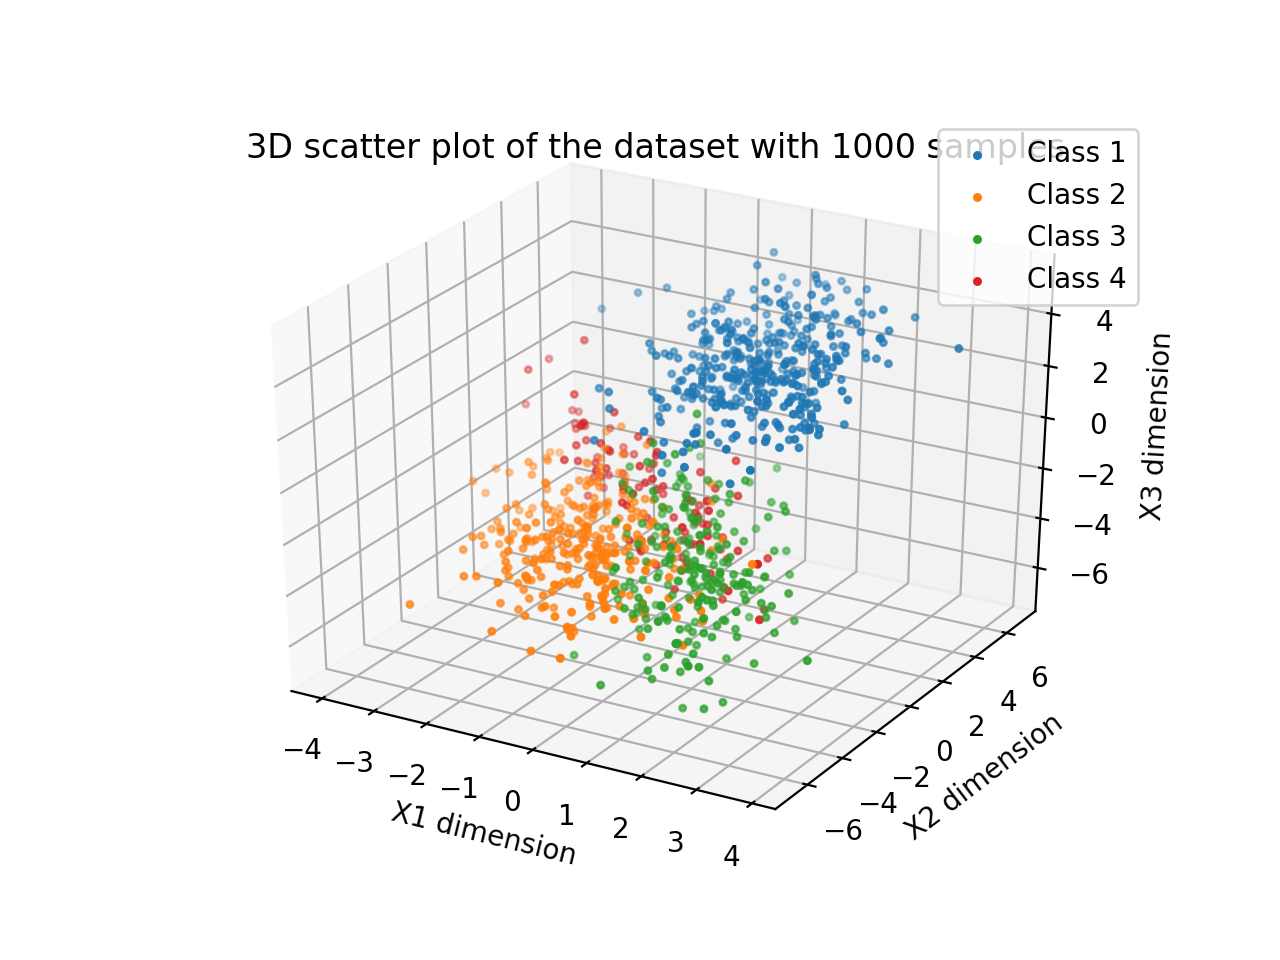

In [49]:
X, Y, _ = sample_data(1000)

In [62]:
nodes, pe = neural_network_cv(X, Y, [10,15,20,25,30,35,40],epochs=1000)

Optimal nodes are 35


Optimal number of perceptrons are 35


<IPython.core.display.Javascript object>


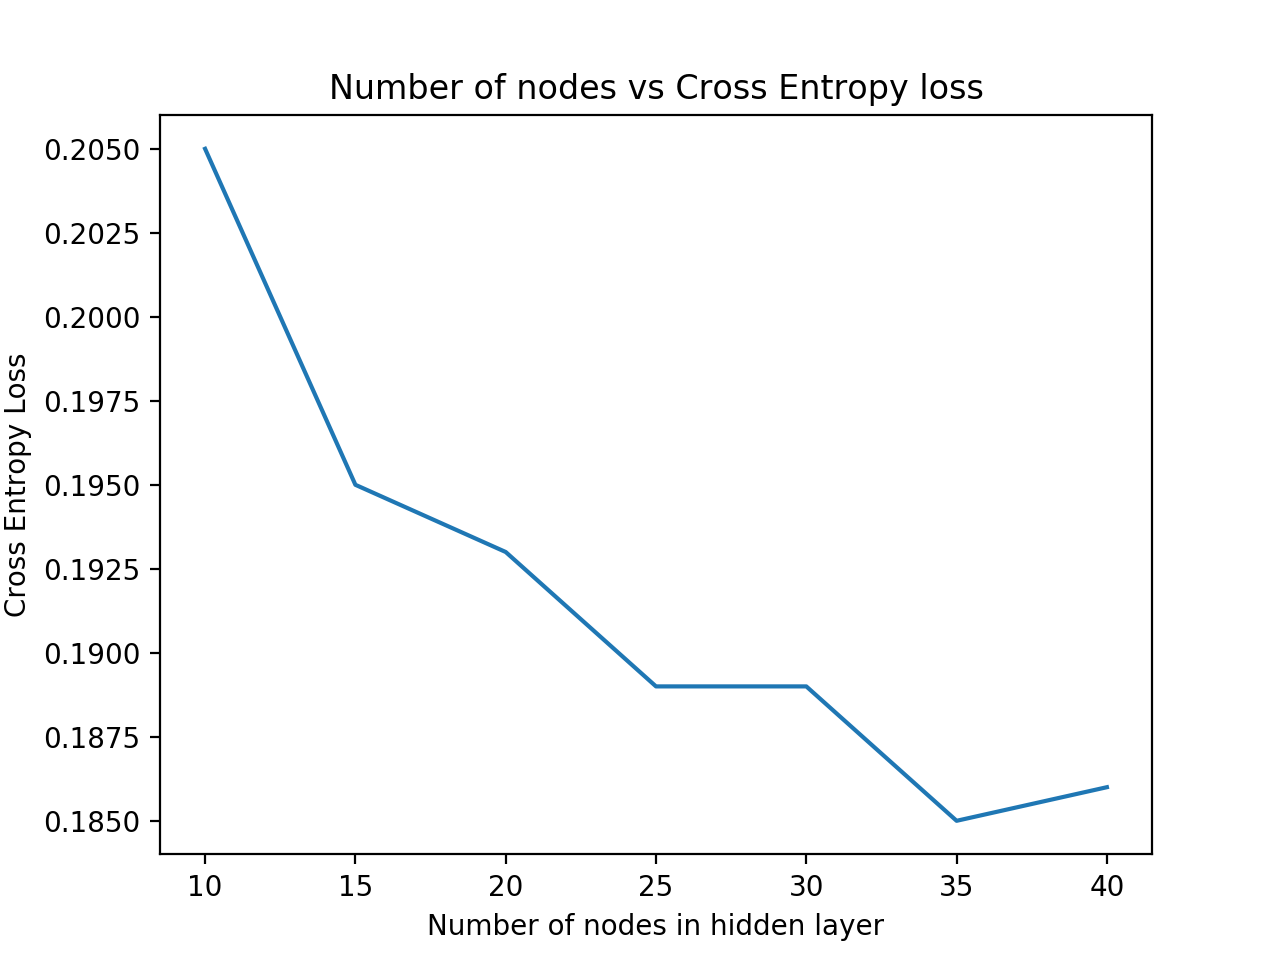

Text(0, 0.5, 'Cross Entropy Loss')

In [65]:
print('Optimal number of perceptrons are {}'.format(nodes))
%matplotlib notebook
plt.plot([10,15,20,25,30,35,40], pe)
plt.title('Number of nodes vs Cross Entropy loss')
plt.xlabel('Number of nodes in hidden layer')
plt.ylabel('Cross Entropy Loss')

In [66]:
# train the final neural network with best model order to maximize data likelihood 
# using all training data in the given set.

model = Sequential()
model.add(Dense(nodes, input_dim=3, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
onehotencoder = OneHotEncoder(categories='auto')
Y_hot = onehotencoder.fit_transform(Y[:, None]).toarray()
model.fit(X, Y_hot, epochs=2000, verbose=0)
y_pred = model.predict_proba(X)
incorrect_class = len(np.nonzero((np.argmax(y_pred, axis=1).reshape((-1,)) + 1) != Y)[0])
print('The number of misclassified samples on train set are {}'.format(incorrect_class))
print('The probability of error on train set is {}'.format(incorrect_class/len(Y)))
y_pred_tenk = model.predict_proba(test_dataset)
incorrect_class_tenk = len(np.nonzero((np.argmax(y_pred_tenk, axis=1).reshape((-1,)) + 1) != test_label)[0])

print('\n\nThe number of misclassified samples on test set are {}'.format(incorrect_class_tenk))
print('The probability of error on train set is {}'.format(incorrect_class_tenk/len(test_label)))

The number of misclassified samples on train set are 77
The probability of error on train set is 0.077


The number of misclassified samples on test set are 918
The probability of error on train set is 0.0918


### 10000 samples

<IPython.core.display.Javascript object>


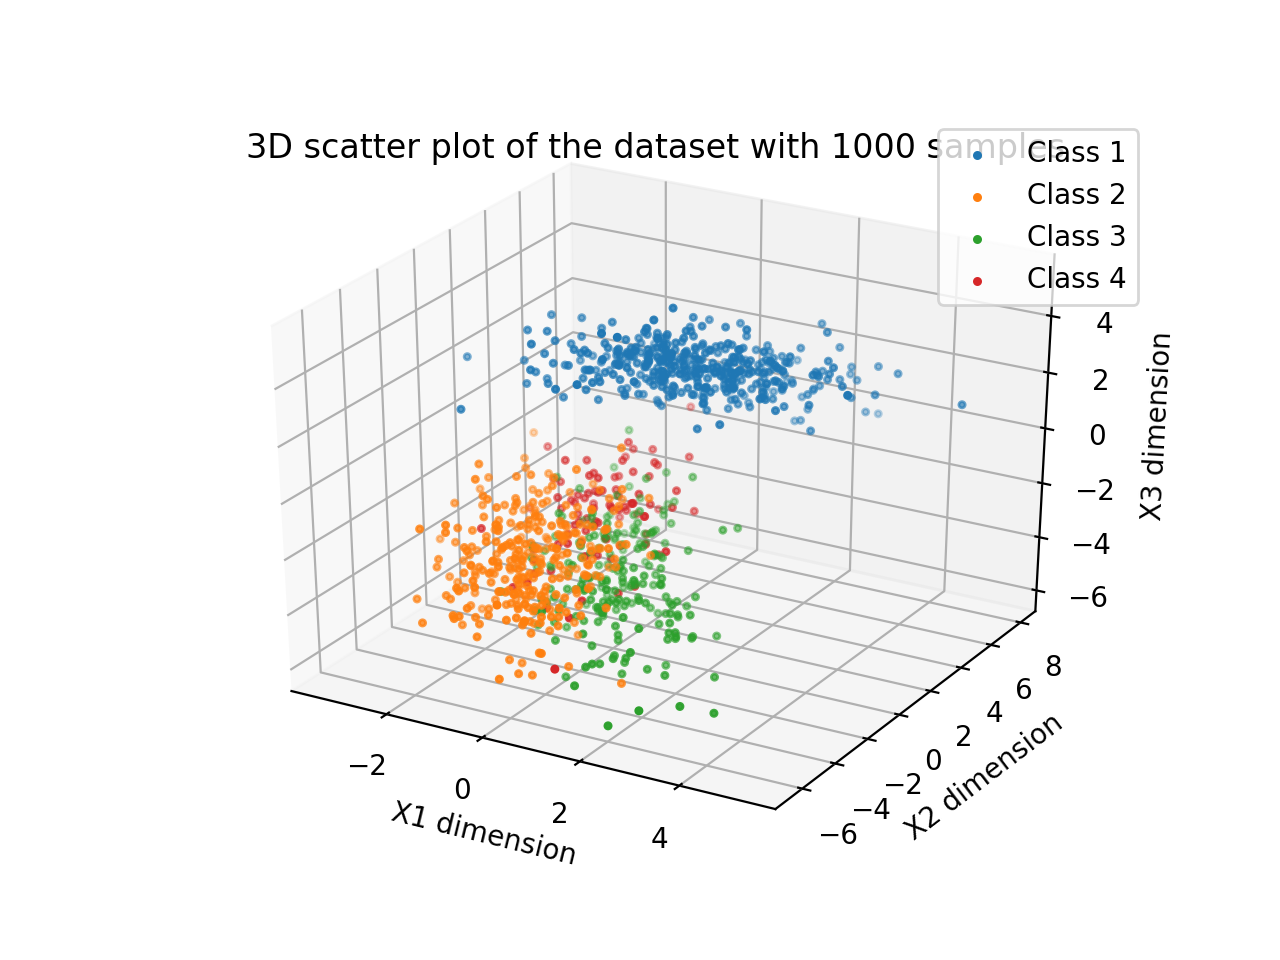

In [51]:
X, Y, _ = sample_data(1000)

In [56]:
nodes, pe = neural_network_cv(X, Y, [10,15,20,25,30,35,40],epochs=5000)

Optimal nodes are 35


Optimal number of perceptrons are 35


<IPython.core.display.Javascript object>


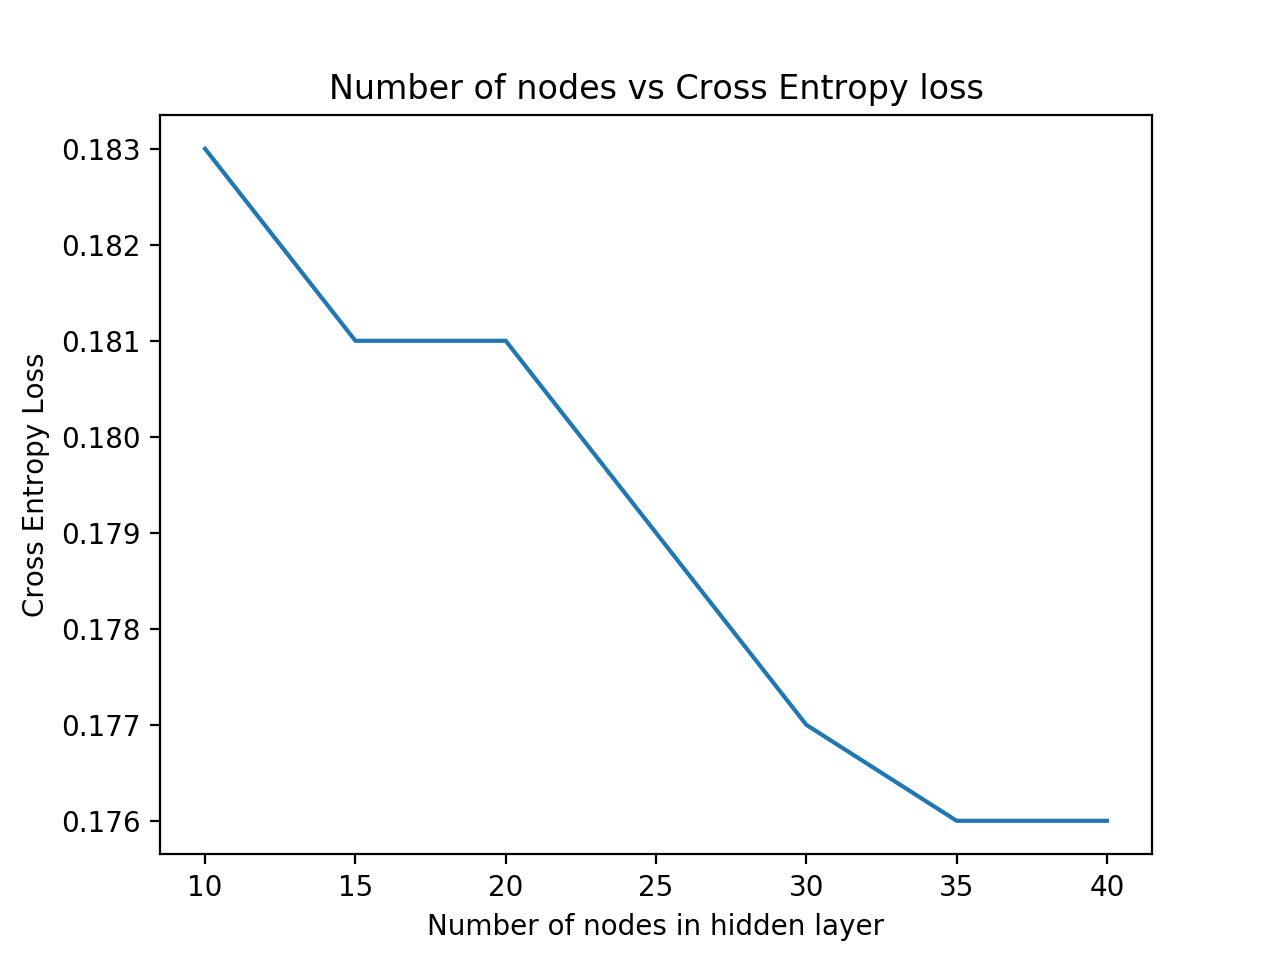

Text(0, 0.5, 'Cross Entropy Loss')

In [57]:
print('Optimal number of perceptrons are {}'.format(nodes))
%matplotlib notebook
plt.plot([10,15,20,25,30,35,40], pe)
plt.title('Number of nodes vs Cross Entropy loss')
plt.xlabel('Number of nodes in hidden layer')
plt.ylabel('Cross Entropy Loss')

In [61]:
# train the final neural network with best model order to maximize data likelihood 
# using all training data in the given set.
model = Sequential()
model.add(Dense(nodes, input_dim=3, activation='sigmoid'))
model.add(Dense(4, activation='softmax'))
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
onehotencoder = OneHotEncoder(categories='auto')
Y_hot = onehotencoder.fit_transform(Y[:, None]).toarray()
model.fit(X, Y_hot, epochs=1000, verbose=0)
y_pred = model.predict_proba(X)
incorrect_class = len(np.nonzero((np.argmax(y_pred, axis=1).reshape((-1,)) + 1) != Y)[0])
print('The number of misclassified samples on train set are {}'.format(incorrect_class))
print('The probability of error on train set is {}'.format(incorrect_class/len(Y)))
y_pred_tenk = model.predict_proba(test_dataset)
incorrect_class_tenk = len(np.nonzero((np.argmax(y_pred_tenk, axis=1).reshape((-1,)) + 1) != test_label)[0])

print('\n\nThe number of misclassified samples on test set are {}'.format(incorrect_class_tenk))
print('The probability of error on test set is {}'.format(incorrect_class_tenk/len(test_label)))

The number of misclassified samples on train set are 79
The probability of error on train set is 0.079


The number of misclassified samples on test set are 894
The probability of error on test set is 0.0894


* Prob of error on test set-
* 100 samples. P(error)=10.03%
* 1000 samples. P(error)=9.18%
* 10000 samples. P(error)=8.94%
* It is observed data with 10000 samples gives the lowest probability of error. As the size of training set increases, performance on test set improves. This relates with intution that more data corresponds to more information about the distribution. The neural network is better able to learn the underlying distribution of the data as data size increases

## Answer 2

We have 2D data sampled i.i.d from mixture of 3 gaussians. There are 1000 samples for training and 10000 for testing. 
- We train and test a single hidden layer MLP function approximator to estimate the value of x2 from the value of x1 by minimizing the mean-squared-error (MSE) on the training set.
- This is a "Regression" problem
- We use 10-fold cross-validation to select between logistic (sigmoid) and softplus (SmoothReLu) nonlinearities for the perceptrons in the hidden layer, as well as the number of perceptrons.
- Output layer is linear 
- The best model architecture is identified using cross- validation, and the selected model is trained with the entire training set.
- This MLP is applied to the test dataset
- Tensorflow and Keras have been used for the problem
- RMSprop is used as update rule for optimization. Mean squared error is the loss function and the accuracy metric

![title](./images/IMG_6589.jpg)
* Gradient Descent Update Rule is - 
![title](./images/1.png)
where L is MSE loss function

In [76]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
from scipy.stats import multivariate_normal
from sklearn.model_selection import KFold
from mpl_toolkits.mplot3d import Axes3D
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


### Generate Data

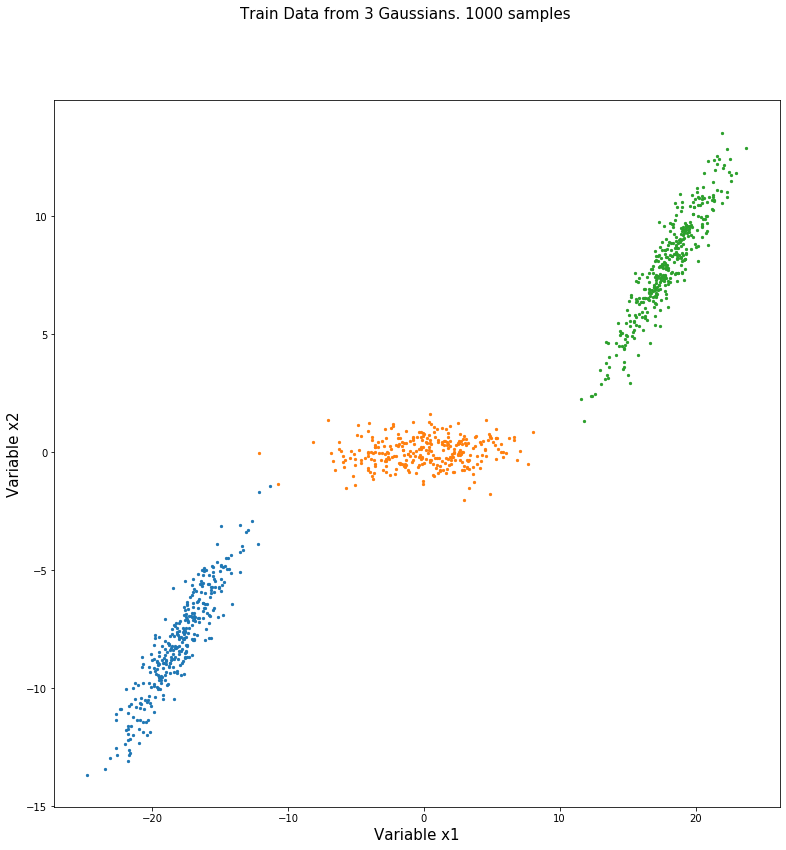

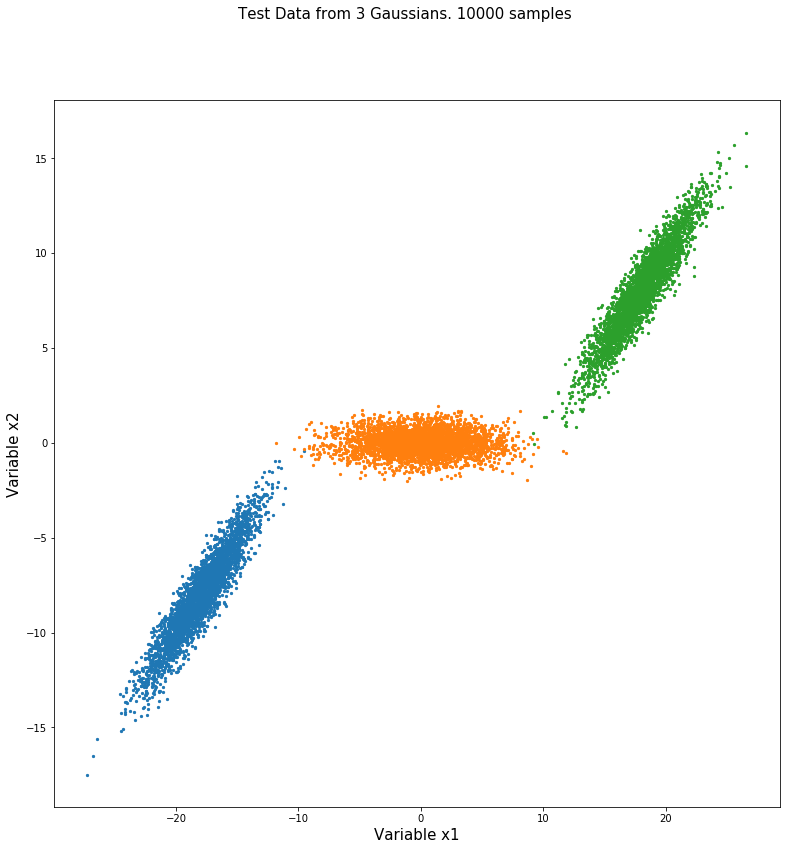

In [77]:
μ1 = [-18, -8]
μ2 = [0, 0]
μ3 = [18, 8]
eigenvalue_cov_mat = np.array([[3.2**2, 0], [0, 0.6**2]])
eigen_vector1 = np.array([[1, -1], [1, 1]])/math.sqrt(2)
eigen_vector2 = np.array([[1, 0], [0, 1]])
eigen_vector3 = np.array([[1, -1], [1, 1]])/math.sqrt(2)
priors=[0.33,0.34,0.33]
data_dist = np.random.uniform(0, 1, 1000)
gaussian1 = (np.matmul(np.matmul(eigen_vector1,(eigenvalue_cov_mat**0.5)),np.random.randn(2, len(data_dist[np.where(data_dist<=priors[0])]))) + np.array(μ1)[:, None]).T
gaussian2 = (np.matmul(np.matmul(eigen_vector2,(eigenvalue_cov_mat**0.5)),np.random.randn(2, len([x for x in data_dist if x<=(priors[0]+priors[1]) and x>priors[0]]))) + np.array(μ2)[:, None]).T
gaussian3 = (np.matmul(np.matmul(eigen_vector3,(eigenvalue_cov_mat**0.5)),np.random.randn(2, len(data_dist[np.where(data_dist>(priors[0]+priors[1]))]))) + np.array(μ3)[:, None]).T
train_dataset = np.vstack([gaussian1, gaussian2, gaussian3])
fig = plt.figure(figsize=(13,13));
plt.xlabel('Variable x1',size=15)
plt.ylabel('Variable x2',size=15)
fig.suptitle('Train Data from 3 Gaussians. 1000 samples', fontsize=15)
plt.scatter(gaussian1[:, 0], gaussian1[:, 1], label='Gaussian 1', s=5)
plt.scatter(gaussian2[:, 0], gaussian2[:, 1], label='Gaussian 2', s=5)
plt.scatter(gaussian3[:, 0], gaussian3[:, 1], label='Gaussian 3', s=5);
data_dist = np.random.uniform(0, 1, 10000)
test_gaussian1 = (np.matmul(np.matmul(eigen_vector1,(eigenvalue_cov_mat**0.5)),np.random.randn(2, len(data_dist[np.where(data_dist<=priors[0])]))) + np.array(μ1)[:, None]).T
test_gaussian2 = (np.matmul(np.matmul(eigen_vector2,(eigenvalue_cov_mat**0.5)),np.random.randn(2, len([x for x in data_dist if x<=(priors[0]+priors[1]) and x>priors[0]]))) + np.array(μ2)[:, None]).T
test_gaussian3 = (np.matmul(np.matmul(eigen_vector3,(eigenvalue_cov_mat**0.5)),np.random.randn(2, len(data_dist[np.where(data_dist>(priors[0]+priors[1]))]))) + np.array(μ3)[:, None]).T
test_dataset = np.vstack([test_gaussian1, test_gaussian2, test_gaussian3])
fig = plt.figure(figsize=(13,13));
plt.xlabel('Variable x1',size=15)
plt.ylabel('Variable x2',size=15)
fig.suptitle('Test Data from 3 Gaussians. 10000 samples', fontsize=15)
plt.scatter(test_gaussian1[:, 0], test_gaussian1[:, 1], label='Gaussian 1', s=5)
plt.scatter(test_gaussian2[:, 0], test_gaussian2[:, 1], label='Gaussian 2', s=5)
plt.scatter(test_gaussian3[:, 0], test_gaussian3[:, 1], label='Gaussian 3', s=5);

### Neural Network

In [78]:
X=train_dataset[:,0]
Y=train_dataset[:,1]
nodes_param=[6,8,10,12,14,16,18,20,22,24]
print("Input shape is ",X.shape)
print("Output shape is ",Y.shape)
def create_model(nodes,activation):
    model = Sequential()
    model.add(Dense(nodes, input_dim=1,activation=activation))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='RMSprop', metrics=['mse'])
    return model
model = keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model,nodes='nodes',activation='activation')
from sklearn.model_selection import GridSearchCV
parameters = {'nodes':nodes_param,'activation':['softplus','sigmoid']}
model_GridSearchCV = GridSearchCV(model, parameters, cv=10,scoring='neg_mean_squared_error')
es = EarlyStopping(monitor='mse', mode='min', verbose=1, patience=10,min_delta=.001)
grid_result=model_GridSearchCV.fit(X, Y, epochs=2000, batch_size=len(X), verbose=0,callbacks=[es]);

Input shape is  (1000,)
Output shape is  (1000,)
Epoch 01835: early stopping
Epoch 01698: early stopping
Epoch 01895: early stopping
Epoch 01874: early stopping
Epoch 01970: early stopping
Epoch 01768: early stopping
Epoch 01719: early stopping
Epoch 01792: early stopping
Epoch 01811: early stopping
Epoch 01594: early stopping
Epoch 01418: early stopping
Epoch 01511: early stopping
Epoch 01726: early stopping
Epoch 01978: early stopping
Epoch 01903: early stopping
Epoch 01511: early stopping
Epoch 01813: early stopping
Epoch 01565: early stopping
Epoch 01490: early stopping
Epoch 01378: early stopping
Epoch 01886: early stopping
Epoch 01502: early stopping
Epoch 01958: early stopping
Epoch 01875: early stopping
Epoch 01723: early stopping
Epoch 01737: early stopping
Epoch 01517: early stopping
Epoch 01650: early stopping
Epoch 01656: early stopping
Epoch 01635: early stopping
Epoch 01490: early stopping
Epoch 01496: early stopping
Epoch 01874: early stopping
Epoch 01932: early stopping

In [79]:
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f  with: %r" % (mean*-1, param))

0.868646  with: {'activation': 'softplus', 'nodes': 6}
0.820282  with: {'activation': 'softplus', 'nodes': 8}
0.844290  with: {'activation': 'softplus', 'nodes': 10}
0.829657  with: {'activation': 'softplus', 'nodes': 12}
0.836811  with: {'activation': 'softplus', 'nodes': 14}
0.800927  with: {'activation': 'softplus', 'nodes': 16}
0.796435  with: {'activation': 'softplus', 'nodes': 18}
0.814368  with: {'activation': 'softplus', 'nodes': 20}
0.787820  with: {'activation': 'softplus', 'nodes': 22}
0.790313  with: {'activation': 'softplus', 'nodes': 24}
8.224010  with: {'activation': 'sigmoid', 'nodes': 6}
4.594001  with: {'activation': 'sigmoid', 'nodes': 8}
2.964180  with: {'activation': 'sigmoid', 'nodes': 10}
2.547253  with: {'activation': 'sigmoid', 'nodes': 12}
2.580252  with: {'activation': 'sigmoid', 'nodes': 14}
2.156557  with: {'activation': 'sigmoid', 'nodes': 16}
2.142057  with: {'activation': 'sigmoid', 'nodes': 18}
2.043342  with: {'activation': 'sigmoid', 'nodes': 20}
2.04

In [80]:
print("Best: %f using parameters %s" % (grid_result.best_score_*-1, grid_result.best_params_))

Best: 0.787820 using parameters {'activation': 'softplus', 'nodes': 22}


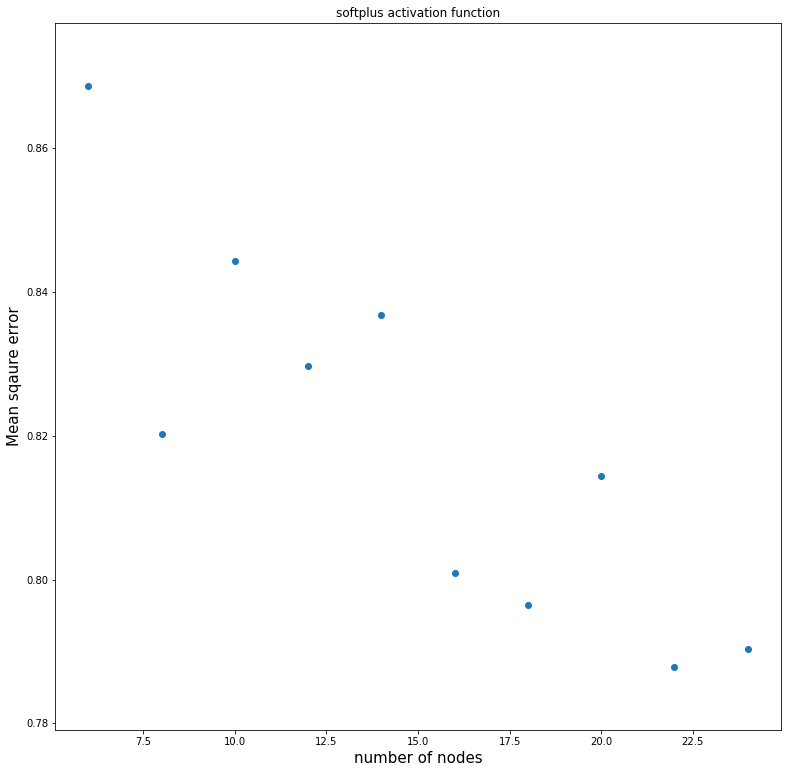

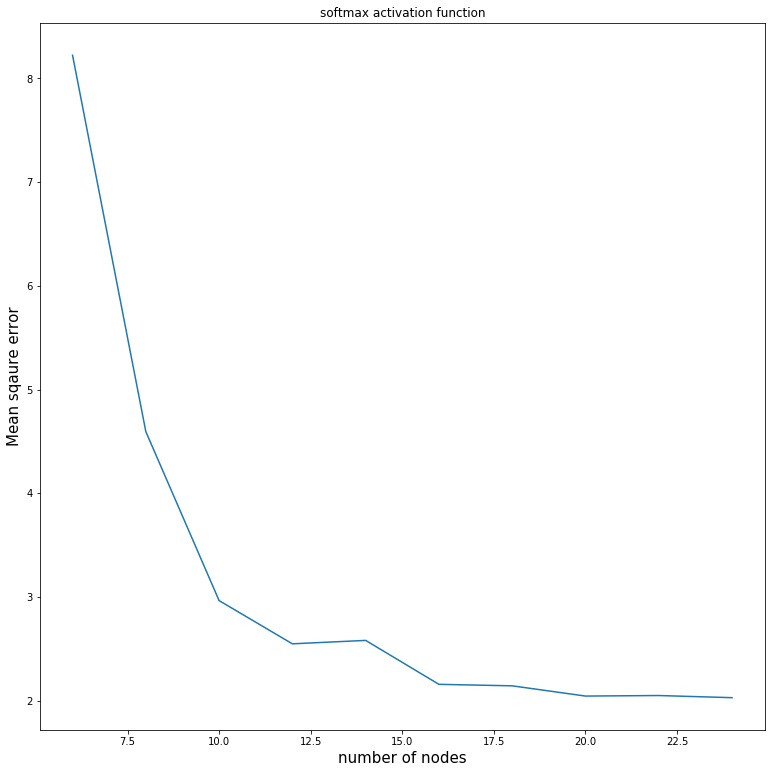

In [83]:
%matplotlib inline
softplus=[]
sigmoid=[]
for mean, param in zip(means, params):
    if (param['activation']=='softplus'):
        softplus.append(mean*-1)
    else:
        sigmoid.append(mean*-1)
fig = plt.figure(figsize=(13,13));
plt.title('softplus activation function')
plt.xlabel('number of nodes',size=15)
plt.ylabel('Mean sqaure error',size=15)
plt.scatter(nodes_param,softplus)
plt.show()
fig = plt.figure(figsize=(13,13));
plt.title('softmax activation function')
plt.xlabel('number of nodes',size=15)
plt.ylabel('Mean sqaure error',size=15)
plt.plot(nodes_param,sigmoid)

plt.show()


In [84]:
best_nodes=grid_result.best_params_['nodes']
best_activation=grid_result.best_params_['activation']

### Train the best parameters on entire dataset and see its accuracy on the test dataset

In [85]:
NN = Sequential()
NN.add(Dense(best_nodes, input_dim=1, activation=best_activation))
NN.add(Dense(1))
NN.compile(loss='mse', optimizer='RMSprop', metrics=['mse'])
NN.fit(train_dataset[:, 0], train_dataset[:, 1], epochs=10000, verbose=0, batch_size=1000,callbacks=[es]);
NN.summary()

Epoch 01620: early stopping
Model: "sequential_897"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1794 (Dense)           (None, 22)                44        
_________________________________________________________________
dense_1795 (Dense)           (None, 1)                 23        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [87]:
!pip install pydot

  Using cached https://files.pythonhosted.org/packages/33/d1/b1479a770f66d962f545c2101630ce1d5592d90cb4f083d38862e93d16d2/pydot-1.4.1-py2.py3-none-any.whl


Mean squared error in the test set is  0.7792155812263489







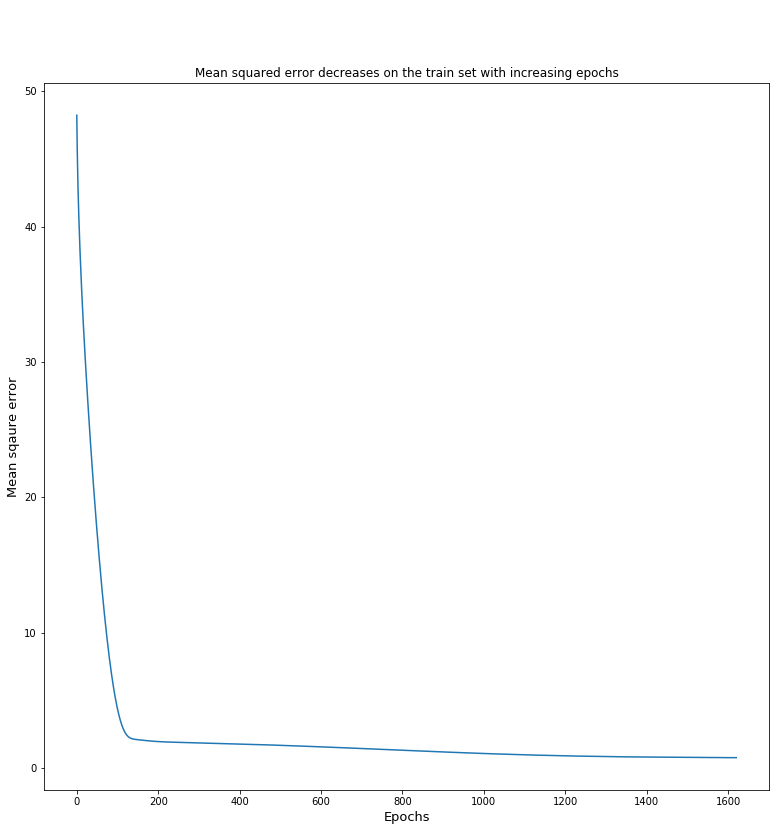

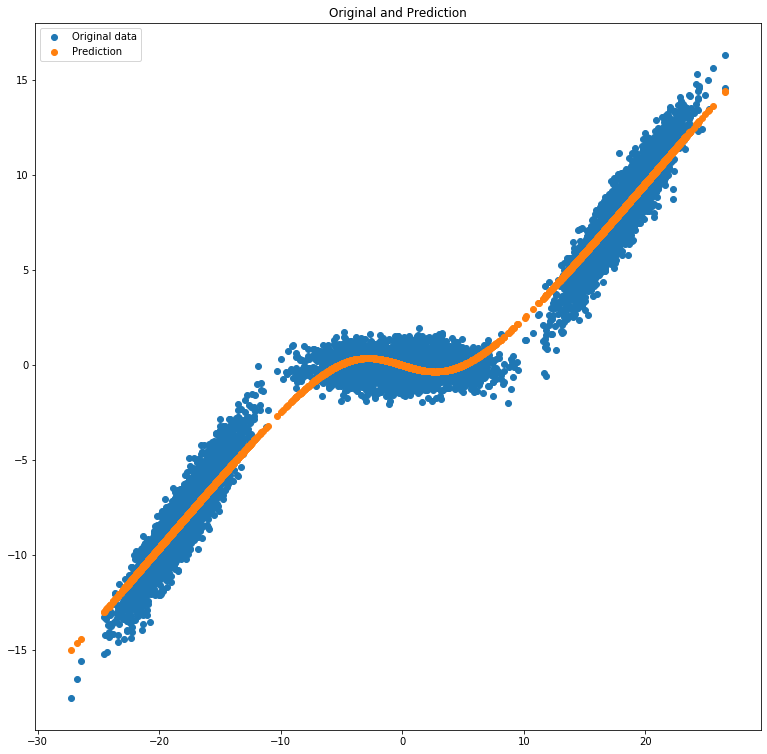

In [91]:
fig = plt.figure(figsize=(13,13));
plt.plot(np.linspace(0,1620,1620),NN.history.history['loss']);

plt.title('\n\n\n\nMean squared error decreases on the train set with increasing epochs')
plt.xlabel('Epochs',size=13)
plt.ylabel('Mean sqaure error',size=13)
scores = NN.evaluate(test_dataset[:, 0], test_dataset[:, 1],verbose=0);
print ("Mean squared error in the test set is ",scores[0])
print ("\n\n\n\n")
fig = plt.figure(figsize=(13,13));
test_pred = NN.predict(test_dataset[:, 0])
plt.scatter(test_dataset[:, 0], test_dataset[:, 1], label = 'Original data')
plt.scatter(test_dataset[:, 0], test_pred, label = 'Prediction')
plt.legend()
plt.title('Original and Prediction');

### References

0. [TensorFlow](https://en.wikipedia.org/wiki/TensorFlow)
1. [Keras](https://www.google.com)
2. [Neural Networks](https://en.wikipedia.org/wiki/Geoffrey_Hinton)
3. [DON'T PANIC](https://en.wikipedia.org/wiki/The_Hitchhiker's_Guide_to_the_Galaxy)
4. [Mo](https://www.youtube.com/watch?v=nTjc1sPktlY)